In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_excel(r'C:\Users\aydar\Downloads\Задание прогноз.xlsx')

In [3]:
df

,week_start,week_end,dialing_fact,avg_wait_time_fact,calls_plan,calls_fact,chats_plan,chats_fact,chatbot_plan,chatbot_fact,people_ottok_fact_fl,people_plan_fl,sr_plan,sr_fact,people_back_fact,people_back_plan
0,2020-03-02 00:00:00,2020-03-08 00:00:00,91.0,110.0,22875.084268,17638.0,21307.379944,20008.0,8221.568652,5809.0,124.0,117.606846,3584.848697,3724.0,48.0,41.890770
1,2020-03-09 00:00:00,2020-03-15 00:00:00,92.0,86.0,22470.328776,17197.0,21163.987268,18898.0,8131.579339,5974.0,124.0,116.124029,3607.927727,3618.0,48.0,41.827156
2,2020-03-16 00:00:00,2020-03-22 00:00:00,84.0,385.0,22574.326279,19987.0,21608.116650,24718.0,8134.949855,8185.0,133.0,117.547783,3602.448776,4147.0,48.0,42.155164
3,2020-03-23 00:00:00,2020-03-29 00:00:00,92.0,111.0,21964.761565,18272.0,21849.779992,23503.0,7878.416209,8537.0,133.0,116.486262,3630.699163,3874.0,48.0,46.504650
4,2020-03-30 00:00:00,2020-04-05 00:00:00,92.0,93.0,17478.485957,17561.0,17860.526789,21257.0,7439.404751,7059.0,133.0,93.906467,4005.307454,3328.0,48.0,46.317950
5,2020-04-06 00:00:00,2020-04-12 00:00:00,93.0,64.0,19200.711225,17034.0,24852.625171,25342.0,7620.256443,7139.0,132.0,116.555336,3989.227542,3231.0,47.0,46.270341
6,2020-04-13 00:00:00,2020-04-19 00:00:00,94.0,62.0,20706.219738,17621.0,23353.605619,26091.0,7793.332086,7699.0,130.0,116.867329,3985.127109,3754.0,47.0,42.262278
7,2020-04-20 00:00:00,2020-04-26 00:00:00,93.0,70.0,19594.256102,18919.0,26536.403700,25902.0,8109.443772,8528.0,131.0,121.951046,3639.924594,3625.0,47.0,41.238831
8,2020-04-27 00:00:00,2020-05-03 00:00:00,92.0,72.0,19878.680998,18939.0,27760.923821,26976.0,8231.061641,8910.0,125.0,125.870148,3551.778090,3397.0,47.0,39.870556
9,2020-05-04 00:00:00,2020-05-10 00:00:00,91.0,131.0,20273.230654,19203.0,28148.607587,27145.0,8318.186552,8761.0,125.0,127.950282,3433.932636,3394.0,41.0,40.970926


In [4]:
data = df[['week_start', 'calls_fact']]

In [5]:
data['week_start'] = pd.to_datetime(data['week_start'])

In [6]:
data.reset_index()
data.columns = ['ds', 'y']

Имеется 21 неделя данных, пусть 16 из них будут для тренировки, а оставшиеся 5 для проверки точность предсказаний

In [7]:
data_train = data[:-27]

In [8]:
data_train

,ds,y
0,2020-03-02,17638.0
1,2020-03-09,17197.0
2,2020-03-16,19987.0
3,2020-03-23,18272.0
4,2020-03-30,17561.0
5,2020-04-06,17034.0
6,2020-04-13,17621.0
7,2020-04-20,18919.0
8,2020-04-27,18939.0
9,2020-05-04,19203.0


In [9]:
clf = Prophet(changepoint_prior_scale = 0.4)
clf.fit(data_train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


In [10]:
future = clf.make_future_dataframe(periods = 5, freq = 'B')
forecast = clf.predict(future)

In [11]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-02,17863.839827,16692.025405,18952.504685,17863.839827,17863.839827,0.0,0.0,0.0,0.0,0.0,0.0,17863.839827
1,2020-03-09,18012.112952,16911.866354,19117.495022,18012.112952,18012.112952,0.0,0.0,0.0,0.0,0.0,0.0,18012.112952
2,2020-03-16,18160.386070,17038.943236,19242.750825,18160.386070,18160.386070,0.0,0.0,0.0,0.0,0.0,0.0,18160.386070
3,2020-03-23,18022.277222,16944.761154,19112.968115,18022.277222,18022.277222,0.0,0.0,0.0,0.0,0.0,0.0,18022.277222
4,2020-03-30,17884.168372,16741.902645,18926.638545,17884.168372,17884.168372,0.0,0.0,0.0,0.0,0.0,0.0,17884.168372
5,2020-04-06,17746.059517,16664.785662,18907.074610,17746.059517,17746.059517,0.0,0.0,0.0,0.0,0.0,0.0,17746.059517
6,2020-04-13,18140.192653,16931.784075,19383.387636,18140.192653,18140.192653,0.0,0.0,0.0,0.0,0.0,0.0,18140.192653
7,2020-04-20,18685.247355,17546.053853,19852.415850,18685.247355,18685.247355,0.0,0.0,0.0,0.0,0.0,0.0,18685.247355
8,2020-04-27,19230.303067,18013.887953,20368.904602,19230.303067,19230.303067,0.0,0.0,0.0,0.0,0.0,0.0,19230.303067
9,2020-05-04,19775.358778,18600.819472,20863.747472,19775.358778,19775.358778,0.0,0.0,0.0,0.0,0.0,0.0,19775.358778


Подкорретируем съехавшие даты

In [12]:
from datetime import timedelta

In [13]:
forecast.loc[[16],['ds']] += timedelta(days = 6)
forecast.loc[[17],['ds']] += timedelta(days = 12)
forecast.loc[[18],['ds']] += timedelta(days = 18)
forecast.loc[[19],['ds']] += timedelta(days = 24)
forecast.loc[[20],['ds']] += timedelta(days = 28)

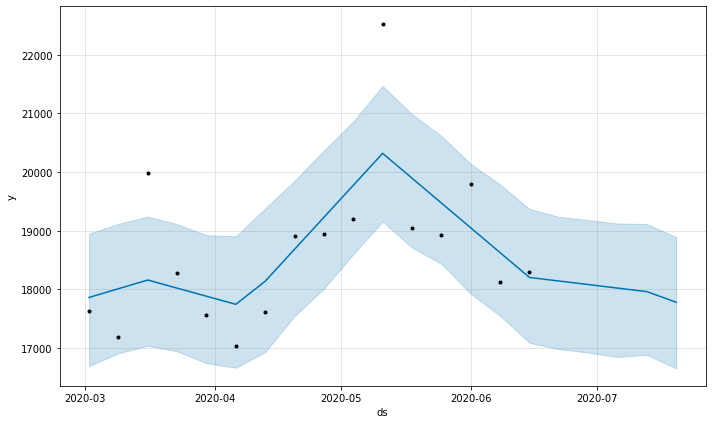

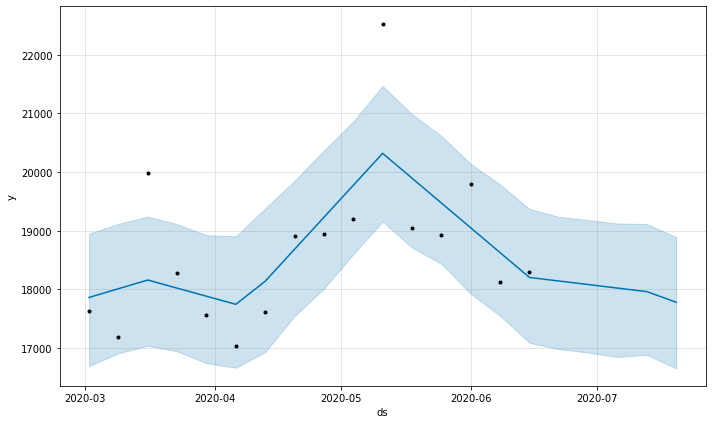

In [14]:
clf.plot(forecast)

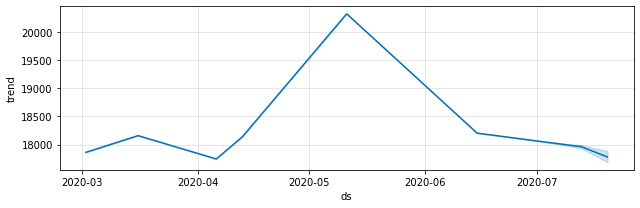

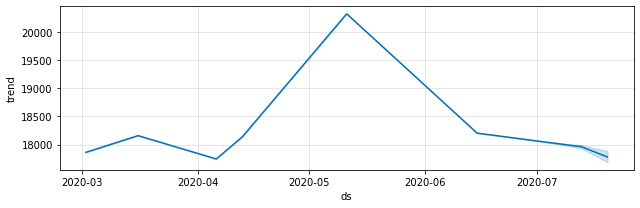

In [15]:
clf.plot_components(forecast)

In [16]:
print(', '.join(forecast.columns))

ds, trend, yhat_lower, yhat_upper, trend_lower, trend_upper, additive_terms, additive_terms_lower, additive_terms_upper, multiplicative_terms, multiplicative_terms_lower, multiplicative_terms_upper, yhat


In [17]:
data_test = data[:-22]

In [18]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data_test.set_index('ds'))

In [19]:
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-02,17863.839827,16692.025405,18952.504685,17638.0
2020-03-09,18012.112952,16911.866354,19117.495022,17197.0
2020-03-16,18160.386070,17038.943236,19242.750825,19987.0
2020-03-23,18022.277222,16944.761154,19112.968115,18272.0
2020-03-30,17884.168372,16741.902645,18926.638545,17561.0
2020-04-06,17746.059517,16664.785662,18907.074610,17034.0
2020-04-13,18140.192653,16931.784075,19383.387636,17621.0
2020-04-20,18685.247355,17546.053853,19852.415850,18919.0
2020-04-27,19230.303067,18013.887953,20368.904602,18939.0


In [20]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-5:]['p'])))
print('MAE', np.mean(abs(cmp_df[-5:]['e'])))

MAPE 1.1907038995303638
MAE 218.44584105349787


Теперь можно обучить модель на всех данных для предсказания результатов, которые не известны. Посмотрим предсказания для последующих 5 недель

In [21]:
def predict_count(value):
    data = df[['week_start', value]]
    data['week_start'] = pd.to_datetime(data['week_start'])
    data.reset_index()
    data.columns = ['ds', 'y']
    data_predict = data[:-22]
    clf = Prophet(changepoint_prior_scale = 0.4)
    clf.fit(data_predict)
    future = clf.make_future_dataframe(periods = 5, freq = 'B')
    forecast = clf.predict(future)
    forecast.loc[[21],['ds']] += timedelta(days = 6)
    forecast.loc[[22],['ds']] += timedelta(days = 12)
    forecast.loc[[23],['ds']] += timedelta(days = 18)
    forecast.loc[[24],['ds']] += timedelta(days = 24)
    forecast.loc[[25],['ds']] += timedelta(days = 28)
    forecast = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]
    return forecast[21:26]

## 	Звонки прогноз

In [22]:
predict_count('calls_fact')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,17514.682077,16383.254749,18515.737028
2020-08-03,17481.562873,16409.866136,18599.394453
2020-08-10,17448.443668,16391.465896,18564.704596
2020-08-17,17415.324464,16318.840516,18516.309441
2020-08-24,17315.966851,16271.557844,18504.250971


## Чаты прогноз

In [23]:
predict_count('chats_fact')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,24439.792320,22792.441829,26199.389378
2020-08-03,24400.647378,22767.442457,26105.499394
2020-08-10,24361.502437,22548.463646,26126.838160
2020-08-17,24322.357496,22674.968447,25961.881766
2020-08-24,24204.922672,22503.870477,25766.691270


## Бот прогноз

In [24]:
predict_count('chatbot_fact')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,9275.896746,8611.192541,9915.126810
2020-08-03,9286.990899,8606.284817,9908.264869
2020-08-10,9298.085052,8644.864931,10044.050876
2020-08-17,9309.179205,8651.982312,9909.988037
2020-08-24,9342.461664,8680.905759,9992.380195


## Люди по прогнозу 1 линия

In [25]:
predict_count('people_ottok_fact_fl')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,120.557417,120.138721,120.955310
2020-08-03,120.514821,120.060304,120.993099
2020-08-10,120.472225,119.991572,120.964172
2020-08-17,120.429629,119.828757,121.043059
2020-08-24,120.301841,118.952104,121.731014


## Запросы в бэк план

In [26]:
predict_count('sr_fact')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,3899.338761,3646.133336,4158.526134
2020-08-03,3896.913912,3633.486490,4150.457385
2020-08-10,3894.489063,3658.449919,4139.796467
2020-08-17,3892.064214,3633.128011,4151.750972
2020-08-24,3884.789667,3616.747536,4129.089228


## Люди в бэке план по прогнозу

In [27]:
predict_count('people_back_fact')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,yhat,yhat_lower,yhat_upper
ds,,,
2020-07-27,39.732457,39.550887,39.926156
2020-08-03,39.699977,39.490894,39.889269
2020-08-10,39.667497,39.463685,39.901808
2020-08-17,39.635017,39.391397,39.888879
2020-08-24,39.537576,39.079292,40.086532
